# Codepth Hackathon                                                                       

Author - Rahul Bordoloi <br>
Website - [Portfolio](https://rahulbordoloi.me)           
Github - [Link](https://github.com/rahulbordoloi)                 
Email - rahulbordoloi24@gmail.com, 1729048@kiit.ac.in                          
Language & Version - Python 3.7.7      
Project Repository Link - [Github](https://github.com/rahulbordoloi/Employee-Attrition.git)             

Problem Statement - 

Need to Devise a ML Algorithm which will help to predict the employees of comapany who would be leaving and control it acccordingly.





Technical Goal - <br> 

To find an optimal solution of a Classification Model. <br>

*   The goal is to find an optimal team of independent variables so that each independent variable of the team has great impact on the dependent variable profits that each independent variable of the team is a powerful predictor that is highly statistically significant.

*   Perform EDA on the datasets given and take out the insightful analysis for Research.








Assumptions -

We make the assumption that the company had given the total database of the employees before attrition.

Project Insights - (Not Done)


*   It has 50K number of invoices along with 47 vitual features of information.
*   5K Columns don't have a clearing date.
*   Range of dates invoices are from 2017-05-19 to 2019-08-06.
*   'raal9' has the highest invoice amount followed by 'Faes6'.





Downloads

*   Problem Statement - [Document Link](https://drive.google.com/file/d/1QpUC9ADne8gCi8nPrwlvEhK8NuDaWTl5/view?usp=sharing)

*   Dataset - [xlsx Link](https://drive.google.com/file/d/14h2JaexZQ2oRH1dt04FvufVu-YVIr0cv/view?usp=sharing)

*   Procedures Followed - [Document Link](https://drive.google.com/file/d/19yGEEIFxY3nae7FjMski-3uzDDUf6JMZ/view?usp=sharing)

*   Libraries Pre-requisites -  [requirements.txt](https://drive.google.com/file/d/1gz-S3CVgvZ5H81hEFlrEBMMcqddBJjsk/view?usp=sharing)        

*   Download Pre-loaded Model -  [Pickle Link](https://drive.google.com/file/d/1EOP91sWILUKdMXzfxbWk9CVODGzhyyWo/view?usp=sharing)

*   Download the iPython Notebook -  [ipynb Link](https://colab.research.google.com/drive/1MZTtt3RuObFuizZeswf4_RAgx9B0ImqL?usp=sharing)


To install , download the file and run -
```
!pip install requirements.txt
```
*   RAM of around 8GB is preferred if run on Local.







# 1. Import Dataset and Libraries

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [218]:
df_exist = pd.read_excel('/content/drive/My Drive/Codepth/DataAnalyticsProblem.xlsx', sheet_name = 'Existing employees')

In [219]:
df_left = pd.read_excel('/content/drive/My Drive/Codepth/DataAnalyticsProblem.xlsx', sheet_name = 'Employees who have left')

# 2. EDA on the Datasets

In [8]:
df_exist.head(10)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low
5,2006,0.36,0.95,3,206,4,0,0,sales,low
6,2007,0.54,0.37,2,176,2,0,0,sales,low
7,2008,0.99,0.91,5,136,4,0,0,sales,low
8,2009,0.50,0.75,6,127,3,0,0,sales,low
9,2010,0.74,0.64,4,268,3,0,0,sales,low


In [9]:
df_left.head(10)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low
5,6,0.41,0.50,2,153,3,0,0,sales,low
6,7,0.10,0.77,6,247,4,0,0,sales,low
7,8,0.92,0.85,5,259,5,0,0,sales,low
8,9,0.89,1.00,5,224,5,0,0,sales,low
9,10,0.42,0.53,2,142,3,0,0,sales,low


In [10]:
df_exist.shape, df_left.shape

((11428, 10), (3571, 10))

Inference : <br>
Before Attrition, There were a total of 14,999‬ Employees working for the company. <br>
And after the Attrition, 3571 employees left the company leaving behind 11428 employees.

1.  Analysis for Existing Employees.

Visualising and Dropping off the Completely Null Columns

In [11]:
# to see how many values are missing in each column.
df_exist.isnull().sum()

Emp ID                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

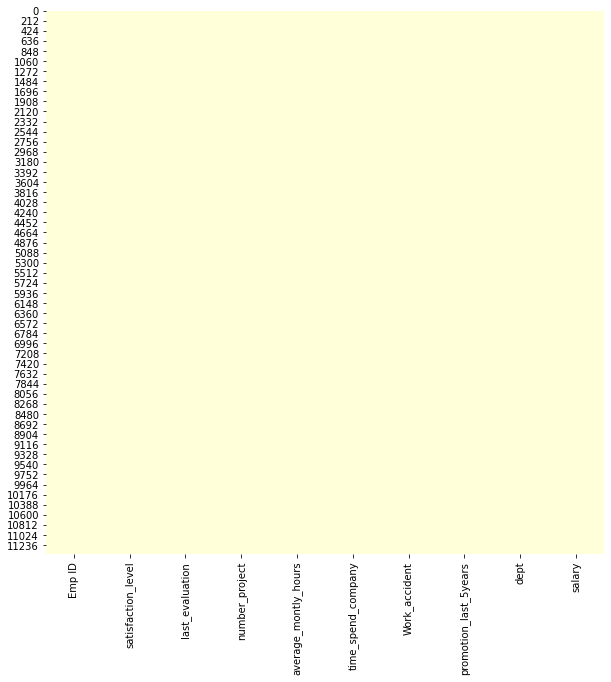

In [12]:
# visualizing and observing the null elements in the dataset
plt.figure(figsize=(10,10))
sns.heatmap(df_exist.isnull(), cbar = False, cmap = 'YlGnBu')   # ploting missing data && # cbar, cmap = colour bar, colour map

Inference : <br>
There are null entries in both the datasets.

Checking for duplicate value columns

In [13]:
x = set()                                                    # set() as to store only the unique values
for i in range(df_exist.shape[1]):
        c1 = df_exist.iloc[:, i]
        for j in range(i + 1, df_exist.shape[1]):
            c2 = df_exist.iloc[:, j]
            if c1.equals(c2):
                x.add(df_exist.columns.values[j])
for col in x:
        print(col)

Inference : <br>
There are No Duplicate Columns

Checking out for constant columns ie columns having same value throughout

In [14]:
# gives out no of unqiue elements per column
df_exist.nunique()

Emp ID                   11428
satisfaction_level          89
last_evaluation             65
number_project               5
average_montly_hours       192
time_spend_company           8
Work_accident                2
promotion_last_5years        2
dept                        10
salary                       3
dtype: int64

Inference : <br>

1.   There are No Constant Columns.
2.   'Work_accident' and 'promotion_last_5years' are Binary Categorical Features.
3.    There are a total of 10 Departments under the Company.
4.    There are only 3 Categories for Salaries that are to be paid to 10 Departments.


In [15]:
df_exist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11428 entries, 0 to 11427
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 11428 non-null  int64  
 1   satisfaction_level     11428 non-null  float64
 2   last_evaluation        11428 non-null  float64
 3   number_project         11428 non-null  int64  
 4   average_montly_hours   11428 non-null  int64  
 5   time_spend_company     11428 non-null  int64  
 6   Work_accident          11428 non-null  int64  
 7   promotion_last_5years  11428 non-null  int64  
 8   dept                   11428 non-null  object 
 9   salary                 11428 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 892.9+ KB


In [16]:
df_exist.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000
mean,7812.340742,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
std,3453.947461,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.159889
min,2001.000000,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,4857.750000,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.000000
50%,7714.500000,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.000000
75%,10571.250000,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.000000
max,14211.000000,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,1.000000


In [17]:
df_exist.columns

Index(['Emp ID', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')

In [168]:
print("For Work Accident : ", df_exist['Work_accident'].unique())
print("For Departments : ", df_exist['dept'].unique())
print("For Promotion in last 5 years : ", df_exist['promotion_last_5years'].unique())
print("For Salary : ", df_exist['salary'].unique())
print("For Number of Projects : ", df_exist['number_project'].unique())
print("For Time Spent in Company : ", df_exist['time_spend_company'].unique())

For Work Accident :  [0 1]
For Departments :  ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'RandD' 'marketing']
For Promotion in last 5 years :  [0 1]
For Salary :  ['low' 'medium' 'high']
For Number of Projects :  [4 2 5 3 6]
For Time Spent in Company :  [ 3  2  4  6  5  8 10  7]


Inference : <br>

1.   The Three categories of Salaries are - 'low' 'medium' 'high'.
2.   The Employees have worked for different number of years with the years being [ 3  2  4  6  5  8 10  7] respectively.
3.   The Employees have usually worked on different projects with the numbers being [4 2 5 3 6] respectively.



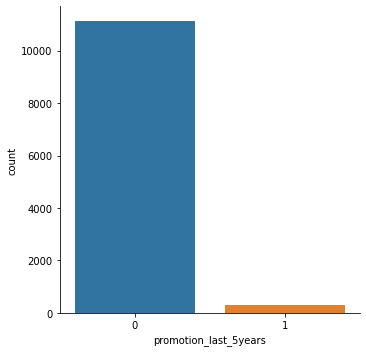

In [116]:
sns.catplot(data = df_exist, kind = 'count', x = 'promotion_last_5years')

In [19]:
df_exist.loc[df_exist.promotion_last_5years == 0, 'promotion_last_5years'].count(), df_exist.loc[df_exist.promotion_last_5years != 0, 'promotion_last_5years'].count()

(11128, 300)

In [20]:
occ = df_exist.loc[df_exist.promotion_last_5years == 0, 'promotion_last_5years'].count()
number_of_occ_per = occ/df_exist.shape[0] * 100
print(str(number_of_occ_per) + '%') 

97.37486874343718%


Inference: <br>
The Feature 'promotion_last_5years' is highly imbalanced Feature.

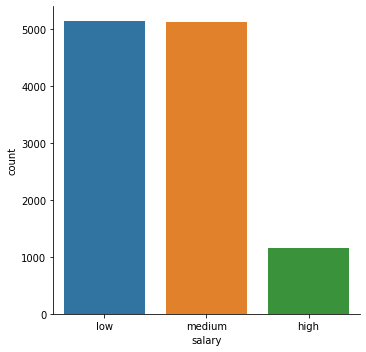

In [117]:
sns.catplot(data = df_exist, kind = 'count', x = 'salary')

In [83]:
# df_exist['salary'].value_counts()
low = df_exist.loc[df_exist.salary == 'low', 'salary'].count()
medium = df_exist.loc[df_exist.salary == 'medium', 'salary'].count()
high = df_exist.loc[df_exist.salary == 'high', 'salary'].count()

print("No. of Employees having Low Salary are : ", low)
print("No. of Employees having Medium Salary are : ", medium)
print("No. of Employees having High Salary are : ", high)

No. of Employees having Low Salary are :  5144
No. of Employees having Medium Salary are :  5129
No. of Employees having High Salary are :  1155


In [ ]:
p = [] 
p.append((low/df_exist.shape[0])*100)
p.append((medium/df_exist.shape[0])*100)
p.append((high/df_exist.shape[0])*100)

print("% of People Having 'Low' Salary : ", p[0], "%")
print("% of People Having 'Medium' Salary : ", p[1], "%")
print("% of People Having 'High' Salary : ", p[2], "%")

% of People Having 'Low' Salary :  45.01225061253062 %
% of People Having 'Medium' Salary :  44.88099404970248 %
% of People Having 'High' Salary :  10.106755337766888 %


Inference : <br>
There are less Highly Paid Employees as compared to Low and Medium wage slab employees.

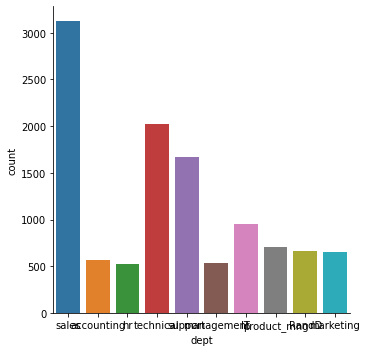

In [118]:
sns.catplot(data = df_exist, kind = 'count', x = 'dept')

In [22]:
x = []
dept = df_exist['dept'].unique()
for i in dept:
  x.append(df_exist.loc[df_exist.dept == i, 'dept'].count())

i=0
while i < len(dept):
  #print(i)
  print("No of Employees in the Department of ",df_exist['dept'].unique()[i]," are : ",x[i])
  i+=1

No of Employees in the Department of  sales  are :  3126
No of Employees in the Department of  accounting  are :  563
No of Employees in the Department of  hr  are :  524
No of Employees in the Department of  technical  are :  2023
No of Employees in the Department of  support  are :  1674
No of Employees in the Department of  management  are :  539
No of Employees in the Department of  IT  are :  954
No of Employees in the Department of  product_mng  are :  704
No of Employees in the Department of  RandD  are :  666
No of Employees in the Department of  marketing  are :  655


Inference : <br>
Out of all the Departments, Sales has the most number of Employees being 3126 and the Least Number of Employees are in the Department of HR being 524 respectively. 

In [34]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
df_exist.loc[:,'sal'] = l.fit_transform(df_exist.loc[:,'salary'])

In [25]:
df_exist.salary.unique(), df_exist.sal.unique()

(array(['low', 'medium', 'high'], dtype=object), array([1, 2, 0]))

<Figure size 1800x432 with 0 Axes>

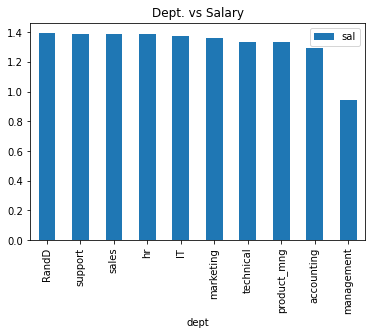

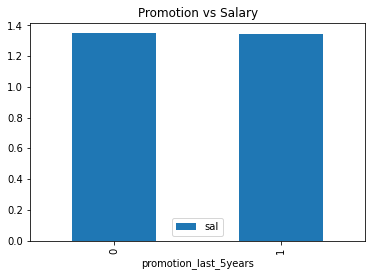

In [26]:
# Checking out the distribution of 'salary' across different variables in Existing Employee List.
plt.figure(figsize=(25, 6))

df = pd.DataFrame(df_exist.groupby(['dept'])['sal'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Dept. vs Salary')
plt.show()

df = pd.DataFrame(df_exist.groupby(['promotion_last_5years'])['sal'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Promotion vs Salary')
plt.show()

In [ ]:
x = []
x.append(df_exist.groupby(['dept'])['sal'].mean().sort_values(ascending = False))
x

[dept
 RandD          1.394895
 support        1.388889
 sales          1.388356
 hr             1.387405
 IT             1.376310
 marketing      1.361832
 technical      1.334652
 product_mng    1.332386
 accounting     1.294849
 management     0.944341
 Name: sal, dtype: float64]

In [ ]:
x = []
x.append(df_exist.groupby(['promotion_last_5years'])['sal'].mean().sort_values(ascending = False))
x

[promotion_last_5years
 0    1.347771
 1    1.346667
 Name: sal, dtype: float64]

Inference : <br>

1.   RandD is the Highest Paid Department followed by Support.
2.   Management is the Least Paid Department.
3.   Salary Amount has no impact on Promotion.



In [37]:
df_exist.drop(['sal'], axis = 1, inplace = True)

In [32]:
x = []
dept = df_exist['dept'].unique()
for i in dept:
  y = df_exist.loc[df_exist.dept == i, 'salary']
  x.append(y.nunique())

print(x)

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


Inference : <br>
So, there's no department wise salary as such, all the departments have all the categories of salary slabs.

In [220]:
df_exist.loc[:,'Attrition'] = int('0')

In [107]:
df_exist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11428 entries, 0 to 11427
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 11428 non-null  int64  
 1   satisfaction_level     11428 non-null  float64
 2   last_evaluation        11428 non-null  float64
 3   number_project         11428 non-null  int64  
 4   average_montly_hours   11428 non-null  int64  
 5   time_spend_company     11428 non-null  int64  
 6   Work_accident          11428 non-null  int64  
 7   promotion_last_5years  11428 non-null  int64  
 8   dept                   11428 non-null  object 
 9   salary                 11428 non-null  object 
 10  Attrition              11428 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 982.2+ KB


In [108]:
df_exist.head(10)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Attrition
0,2001,0.58,0.74,4,215,3,0,0,sales,low,0
1,2002,0.82,0.67,2,202,3,0,0,sales,low,0
2,2003,0.45,0.69,5,193,3,0,0,sales,low,0
3,2004,0.78,0.82,5,247,3,0,0,sales,low,0
4,2005,0.49,0.60,3,214,2,0,0,sales,low,0
5,2006,0.36,0.95,3,206,4,0,0,sales,low,0
6,2007,0.54,0.37,2,176,2,0,0,sales,low,0
7,2008,0.99,0.91,5,136,4,0,0,sales,low,0
8,2009,0.50,0.75,6,127,3,0,0,sales,low,0
9,2010,0.74,0.64,4,268,3,0,0,sales,low,0


2.  Analysis for Employees who Left.

Visualising and Dropping off the Completely Null Columns

In [43]:
# to see how many values are missing in each column.
df_left.isnull().sum()

Emp ID                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

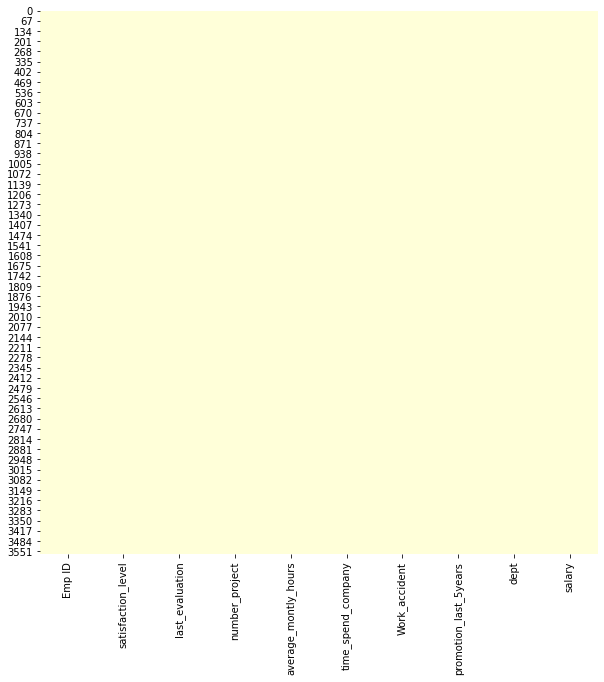

In [44]:
# visualizing and observing the null elements in the dataset
plt.figure(figsize=(10,10))
sns.heatmap(df_left.isnull(), cbar = False, cmap = 'YlGnBu')   # ploting missing data && # cbar, cmap = colour bar, colour map

Inference : <br>
There are null entries in both the datasets.

Checking for duplicate value columns

In [45]:
x = set()                                                    # set() as to store only the unique values
for i in range(df_left.shape[1]):
        c1 = df_left.iloc[:, i]
        for j in range(i + 1, df_left.shape[1]):
            c2 = df_left.iloc[:, j]
            if c1.equals(c2):
                x.add(df_left.columns.values[j])
for col in x:
        print(col)

Inference : <br>
There are No Duplicate Columns

Checking out for constant columns ie columns having same value throughout

In [46]:
# gives out no of unqiue elements per column
df_left.nunique()

Emp ID                   3571
satisfaction_level         81
last_evaluation            54
number_project              6
average_montly_hours      164
time_spend_company          5
Work_accident               2
promotion_last_5years       2
dept                       10
salary                      3
dtype: int64

In [50]:
df_left.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 3571 non-null   int64  
 1   satisfaction_level     3571 non-null   float64
 2   last_evaluation        3571 non-null   float64
 3   number_project         3571 non-null   int64  
 4   average_montly_hours   3571 non-null   int64  
 5   time_spend_company     3571 non-null   int64  
 6   Work_accident          3571 non-null   int64  
 7   promotion_last_5years  3571 non-null   int64  
 8   dept                   3571 non-null   object 
 9   salary                 3571 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 279.1+ KB


In [49]:
df_left.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000
mean,6500.439653,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321
std,6266.484705,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.072759
min,1.000000,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,0.000000
25%,893.500000,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,0.000000
50%,1786.000000,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,0.000000
75%,12678.500000,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,0.000000
max,14999.000000,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.000000


In [51]:
df_left.columns

Index(['Emp ID', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')

In [170]:
print("For Number of Projects : ", df_left['number_project'].unique())
print("For Time Spent in Company : ", df_left['time_spend_company'].unique())

For Number of Projects :  [2 5 7 6 4 3]
For Time Spent in Company :  [3 6 4 5 2]


Inference : <br>

1.   The Employees have worked for different number of years with the years being [3 6 4 5 2] respectively. <br>
On a Comparative Note : 

*   Employees who have left the job tend to spend more time working as compared to the existing Employees.
*   The Maximum time spent by an Employee individually is more in case of existing than the ones who left.


2.   The Employees have usually worked on different projects with the numbers being [2 5 7 6 4 3] respectively. <br>
On a Comparative Note : <br>

*   Employees who have left the job tend to have less number of projects as compared to the existing Employees.
*   The Maximum number of project performed by an Employee individually is more in case of left than the one who are existing.




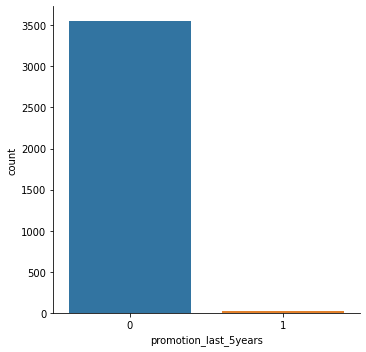

In [119]:
sns.catplot(data = df_left, kind = 'count', x = 'promotion_last_5years')

In [54]:
df_left.loc[df_left.promotion_last_5years == 0, 'promotion_last_5years'].count(), df_left.loc[df_left.promotion_last_5years != 0, 'promotion_last_5years'].count()

(3552, 19)

In [55]:
occ = df_left.loc[df_left.promotion_last_5years == 0, 'promotion_last_5years'].count()
number_of_occ_per = occ/df_left.shape[0] * 100
print(str(number_of_occ_per) + '%') 

99.46793615233828%


Inference: <br>
The Feature 'promotion_last_5years' is highly imbalanced Feature and a Quasi-Constant Feature.

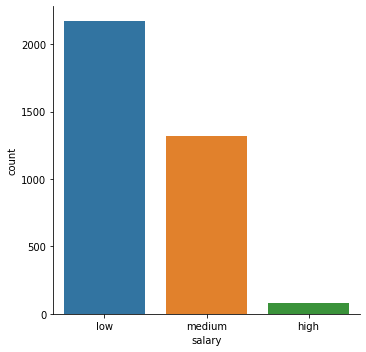

In [120]:
sns.catplot(data = df_left, kind = 'count', x = 'salary')

In [121]:
low = df_left.loc[df_left.salary == 'low', 'salary'].count()
medium = df_left.loc[df_left.salary == 'medium', 'salary'].count()
high = df_left.loc[df_left.salary == 'high', 'salary'].count()

print("No. of Employees who had Low Salary are : ", low)
print("No. of Employees who had Medium Salary are : ", medium)
print("No. of Employees who had High Salary are : ", high)

No. of Employees who had Low Salary are :  2172
No. of Employees who had Medium Salary are :  1317
No. of Employees who had High Salary are :  82


In [122]:
p = [] 
p.append((low/df_left.shape[0])*100)
p.append((medium/df_left.shape[0])*100)
p.append((high/df_left.shape[0])*100)

print("% of People who had 'Low' Salary : ", p[0], "%")
print("% of People who had 'Medium' Salary : ", p[1], "%")
print("% of People who had 'High' Salary : ", p[2], "%")

% of People who had 'Low' Salary :  60.82329879585551 %
% of People who had 'Medium' Salary :  36.88042565107813 %
% of People who had 'High' Salary :  2.2962755530663683 %


Inference : <br>
The % of people leaving the company were the ones with low salaries.

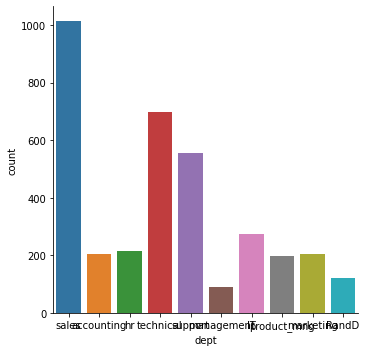

In [124]:
sns.catplot(data = df_left, kind = 'count', x = 'dept')

In [123]:
x = []
dept = df_left['dept'].unique()
for i in dept:
  x.append(df_left.loc[df_left.dept == i, 'dept'].count())

i=0
while i < len(dept):
  #print(i)
  print("No of Employees were in the Department of ",df_left['dept'].unique()[i]," are : ",x[i])
  i+=1

No of Employees were in the Department of  sales  are :  1014
No of Employees were in the Department of  accounting  are :  204
No of Employees were in the Department of  hr  are :  215
No of Employees were in the Department of  technical  are :  697
No of Employees were in the Department of  support  are :  555
No of Employees were in the Department of  management  are :  91
No of Employees were in the Department of  IT  are :  273
No of Employees were in the Department of  product_mng  are :  198
No of Employees were in the Department of  marketing  are :  203
No of Employees were in the Department of  RandD  are :  121


Inference : <br>

1.   Out of all the Departments, Maximum People left the company from the Department of Sales being 1014 followed by Technical.

2.   Department of Management has the least number of attrition being 91 followed by RandD

In [58]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
df_left.loc[:,'sal'] = l.fit_transform(df_left.loc[:,'salary'])

In [59]:
df_left.salary.unique(), df_left.sal.unique()

(array(['low', 'medium', 'high'], dtype=object), array([1, 2, 0]))

<Figure size 1800x432 with 0 Axes>

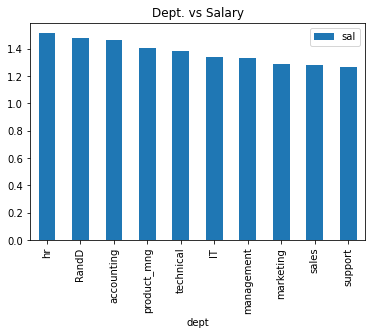

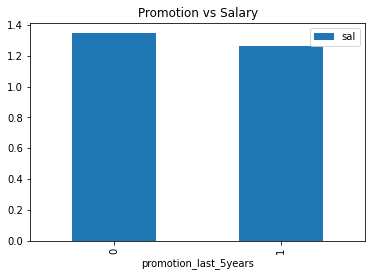

In [60]:
# Checking out the distribution of 'salary' across different variables in Existing Employee List.
plt.figure(figsize=(25, 6))

df = pd.DataFrame(df_left.groupby(['dept'])['sal'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Dept. vs Salary')
plt.show()

df = pd.DataFrame(df_left.groupby(['promotion_last_5years'])['sal'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Promotion vs Salary')
plt.show()

In [61]:
x = []
x.append(df_left.groupby(['dept'])['sal'].mean().sort_values(ascending = False))
x

[dept
 hr             1.516279
 RandD          1.479339
 accounting     1.465686
 product_mng    1.409091
 technical      1.385940
 IT             1.340659
 management     1.329670
 marketing      1.290640
 sales          1.285010
 support        1.270270
 Name: sal, dtype: float64]

In [62]:
x = []
x.append(df_left.groupby(['promotion_last_5years'])['sal'].mean().sort_values(ascending = False))
x

[promotion_last_5years
 0    1.346284
 1    1.263158
 Name: sal, dtype: float64]

Inference : <br>

1.   Amongst the employees who left, HR Dept was the Highest Paying and Support Dept was the Least.
3.   Employees who had no promotion in the last 5 years tend to quit the job more as compared to those who had promotion.



In [63]:
df_left.drop(['sal'], axis = 1, inplace = True)

In [64]:
x = []
dept = df_left['dept'].unique()
for i in dept:
  y = df_left.loc[df_left.dept == i, 'salary']
  x.append(y.nunique())

print(x)

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


Inference : <br>
So, there's no department wise salary as such, all the departments have all the categories of salary slabs.

In [221]:
df_left.loc[:,'Attrition'] = int('1')

In [109]:
df_left.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 3571 non-null   int64  
 1   satisfaction_level     3571 non-null   float64
 2   last_evaluation        3571 non-null   float64
 3   number_project         3571 non-null   int64  
 4   average_montly_hours   3571 non-null   int64  
 5   time_spend_company     3571 non-null   int64  
 6   Work_accident          3571 non-null   int64  
 7   promotion_last_5years  3571 non-null   int64  
 8   dept                   3571 non-null   object 
 9   salary                 3571 non-null   object 
 10  Attrition              3571 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 307.0+ KB


In [110]:
df_left.head(10)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Attrition
0,1,0.38,0.53,2,157,3,0,0,sales,low,1
1,2,0.80,0.86,5,262,6,0,0,sales,medium,1
2,3,0.11,0.88,7,272,4,0,0,sales,medium,1
3,4,0.72,0.87,5,223,5,0,0,sales,low,1
4,5,0.37,0.52,2,159,3,0,0,sales,low,1
5,6,0.41,0.50,2,153,3,0,0,sales,low,1
6,7,0.10,0.77,6,247,4,0,0,sales,low,1
7,8,0.92,0.85,5,259,5,0,0,sales,low,1
8,9,0.89,1.00,5,224,5,0,0,sales,low,1
9,10,0.42,0.53,2,142,3,0,0,sales,low,1


# 3. Merging both the DataFrames

In [222]:
#concatenating both the datasets together
df = pd.concat([df_exist, df_left], ignore_index = False, axis = 0)

In [114]:
df.head(5), df.tail(5)

(   Emp ID  satisfaction_level  last_evaluation  ...   dept  salary  Attrition
 0    2001                0.58             0.74  ...  sales     low          0
 1    2002                0.82             0.67  ...  sales     low          0
 2    2003                0.45             0.69  ...  sales     low          0
 3    2004                0.78             0.82  ...  sales     low          0
 4    2005                0.49             0.60  ...  sales     low          0
 
 [5 rows x 11 columns],
       Emp ID  satisfaction_level  last_evaluation  ...     dept  salary  Attrition
 3566   14995                0.40             0.57  ...  support     low          1
 3567   14996                0.37             0.48  ...  support     low          1
 3568   14997                0.37             0.53  ...  support     low          1
 3569   14998                0.11             0.96  ...  support     low          1
 3570   14999                0.37             0.52  ...  support     low        

In [71]:
df.shape

(14999, 11)

# 4. EDA on the Merged DataFrame

In [99]:
print(df['salary'].value_counts())
print(df_left['salary'].value_counts())

low       7316
medium    6446
high      1237
Name: salary, dtype: int64
low       2172
medium    1317
high        82
Name: salary, dtype: int64


In [101]:
print("% of 'Low' Salaried Employees that Left : ", 2172/7316*100, "%")
print("% of 'Medium' Salaried Employees that Left : ", 1317/6446*100, "%")
print("% of 'High' Salaried Employees that Left : ", 82/1237*100, "%")

% of 'Low' Salaried Employees that Left :  29.68835429196282 %
% of 'Medium' Salaried Employees that Left :  20.431275209432208 %
% of 'High' Salaried Employees that Left :  6.628940986257073 %


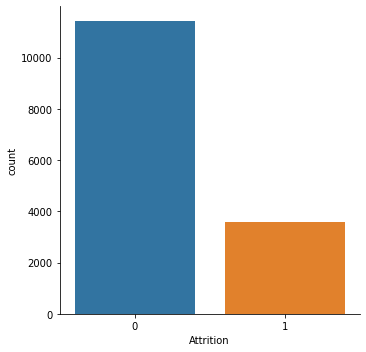

In [115]:
sns.catplot(data = df, kind = 'count', x = 'Attrition')

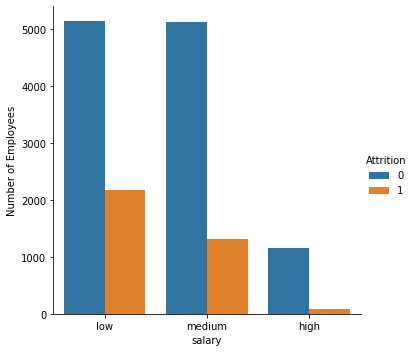

In [129]:
sns.catplot(x = 'salary', data = df, kind='count', hue='Attrition').set_ylabels('Number of Employees')

Inference : <br>
So, Salary is definitely a major factor in attrition.

In [161]:
cols = df.dept.unique()

print("***Before Attrition***")

y = []
for i in cols:
  y.append(df.loc[df.dept == i, 'dept'].count())
print(cols, "\n", y)

print('---------------')

print("***Left***")

for i in range(len(cols)):
  print(cols[i], " : ", y[i])

for i in range(len(cols)):
  print(cols[i], " : ", y[i])

***Before Attrition***
['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'RandD' 'marketing'] 
 [4140, 767, 739, 2720, 2229, 630, 1227, 902, 787, 858]
---------------
***Left***
sales  :  4140
accounting  :  767
hr  :  739
technical  :  2720
support  :  2229
management  :  630
IT  :  1227
product_mng  :  902
RandD  :  787
marketing  :  858
sales  :  4140
accounting  :  767
hr  :  739
technical  :  2720
support  :  2229
management  :  630
IT  :  1227
product_mng  :  902
RandD  :  787
marketing  :  858


In [162]:
for i in range(len(cols)):
  print("% of ", cols[i], " Employees that Left : ", x[i]/y[i]*100, "%")

% of  sales  Employees that Left :  24.492753623188406 %
% of  accounting  Employees that Left :  26.597131681877446 %
% of  hr  Employees that Left :  29.093369418132614 %
% of  technical  Employees that Left :  25.624999999999996 %
% of  support  Employees that Left :  24.89905787348587 %
% of  management  Employees that Left :  14.444444444444443 %
% of  IT  Employees that Left :  22.249388753056234 %
% of  product_mng  Employees that Left :  21.951219512195124 %
% of  RandD  Employees that Left :  25.794155019059723 %
% of  marketing  Employees that Left :  14.102564102564102 %


Inference : <br>
Through % of employees leaving the company from their respective departments are almost same, but % is highest in case of HR which is 29% and lowest in the case of Marketing ie 14%.

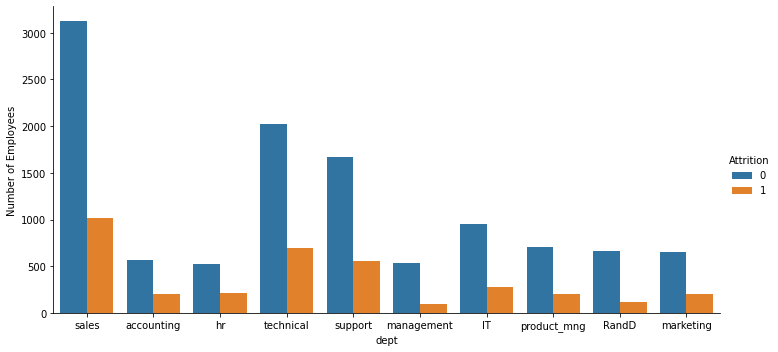

In [166]:
sns.catplot('dept', data = df, aspect = 2, kind = 'count', hue='Attrition').set_ylabels('Number of Employees')

In [167]:
df.columns

Index(['Emp ID', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary', 'Attrition'],
      dtype='object')

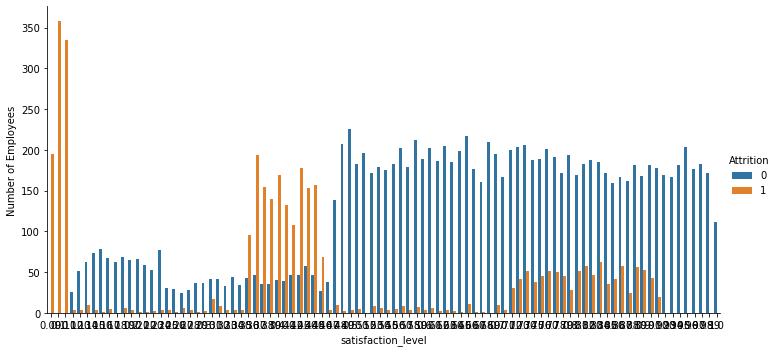

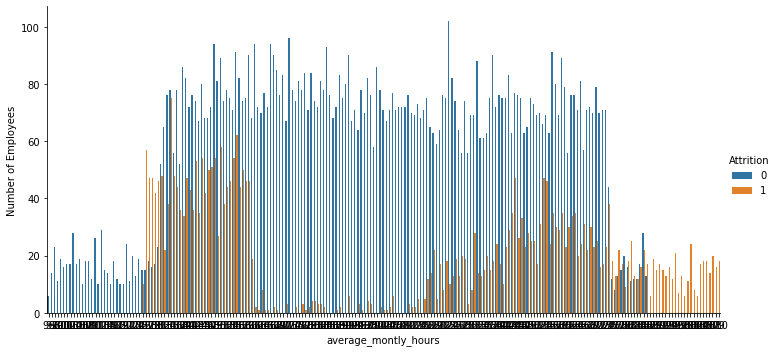

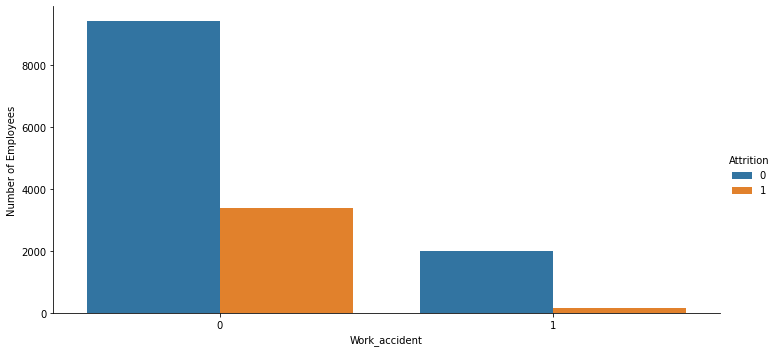

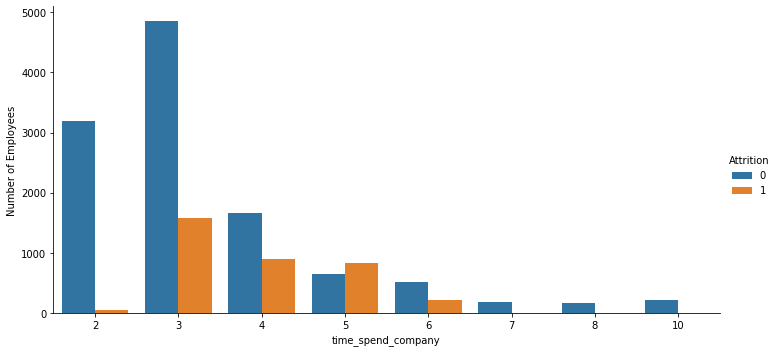

In [171]:
sns.catplot('satisfaction_level', data = df, aspect = 2, kind = 'count', hue='Attrition').set_ylabels('Number of Employees')
sns.catplot('average_montly_hours', data = df, aspect = 2, kind = 'count', hue='Attrition').set_ylabels('Number of Employees')
sns.catplot('Work_accident', data = df, aspect = 2, kind = 'count', hue='Attrition').set_ylabels('Number of Employees')
sns.catplot('time_spend_company', data = df, aspect = 2, kind = 'count', hue='Attrition').set_ylabels('Number of Employees')

Inference : <br>


1.   There is no such trend of Attrition in case of Work Accidents.
2.   People who have spent less time with the company tends to leave it earlier as compared to the ones who are here for a longer period of time.
3.   There's no such specific pattern as such, but the employees working highly overtime tend to leave the company.
4.   Same is the case for Satifaction Level, employees less satified with their job end to leave their job earlier.



# 5. Feature Engineering and Selection

In [172]:
df.head(5)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Attrition
0,2001,0.58,0.74,4,215,3,0,0,sales,low,0
1,2002,0.82,0.67,2,202,3,0,0,sales,low,0
2,2003,0.45,0.69,5,193,3,0,0,sales,low,0
3,2004,0.78,0.82,5,247,3,0,0,sales,low,0
4,2005,0.49,0.60,3,214,2,0,0,sales,low,0


In [223]:
df.drop(['Emp ID'], inplace = True, axis = 1)     # removing redundant feature(s)

In [224]:
df.shape

(14999, 10)

In [175]:
df.dept.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: dept, dtype: int64

In [176]:
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

Inference : <br>
Since, the categorical features are not exhibiting much bias-ness, I would prefer applying K-Fold Target Encoding to map with the dependent feature.

Checking and learning about the train set's skewness.

In [177]:
#checking the skewness of the train set
df.skew(axis = 0, skipna = True)

satisfaction_level      -0.476360
last_evaluation         -0.026622
number_project           0.337706
average_montly_hours     0.052842
time_spend_company       1.853319
Work_accident            2.021149
promotion_last_5years    6.636968
Attrition                1.230043
dtype: float64

Inference : <br>

1.   Some Features seems to be a lightly right skewed.
2.   The Highly Skewed Feature is 'promotion_last_5years' followed by 'Work_accident' and 'time_spend_company'.
3.   Data here excludes the categorical columns.
4.   Skewness for dependent feature isn't to be considered.

Checking for Correlation

In [180]:
# gives out the columns which are highly correlated amongst each other

def correlation(df, threshold = 0.90):
    corr_col = set() # Set of all the names of deleted columns
    corr_m = df.corr()
    for i in range(len(corr_m.columns)):
        for j in range(i):
            if (corr_m.iloc[i, j] >= threshold) and (corr_m.columns[j] not in corr_col):
                col = corr_m.columns[i] # getting the name of column
                corr_col.add(col)
    return corr_col

print(correlation(df,0.9))

set()


Inference : <br>
There are no correlated features




# 6. Visualizations

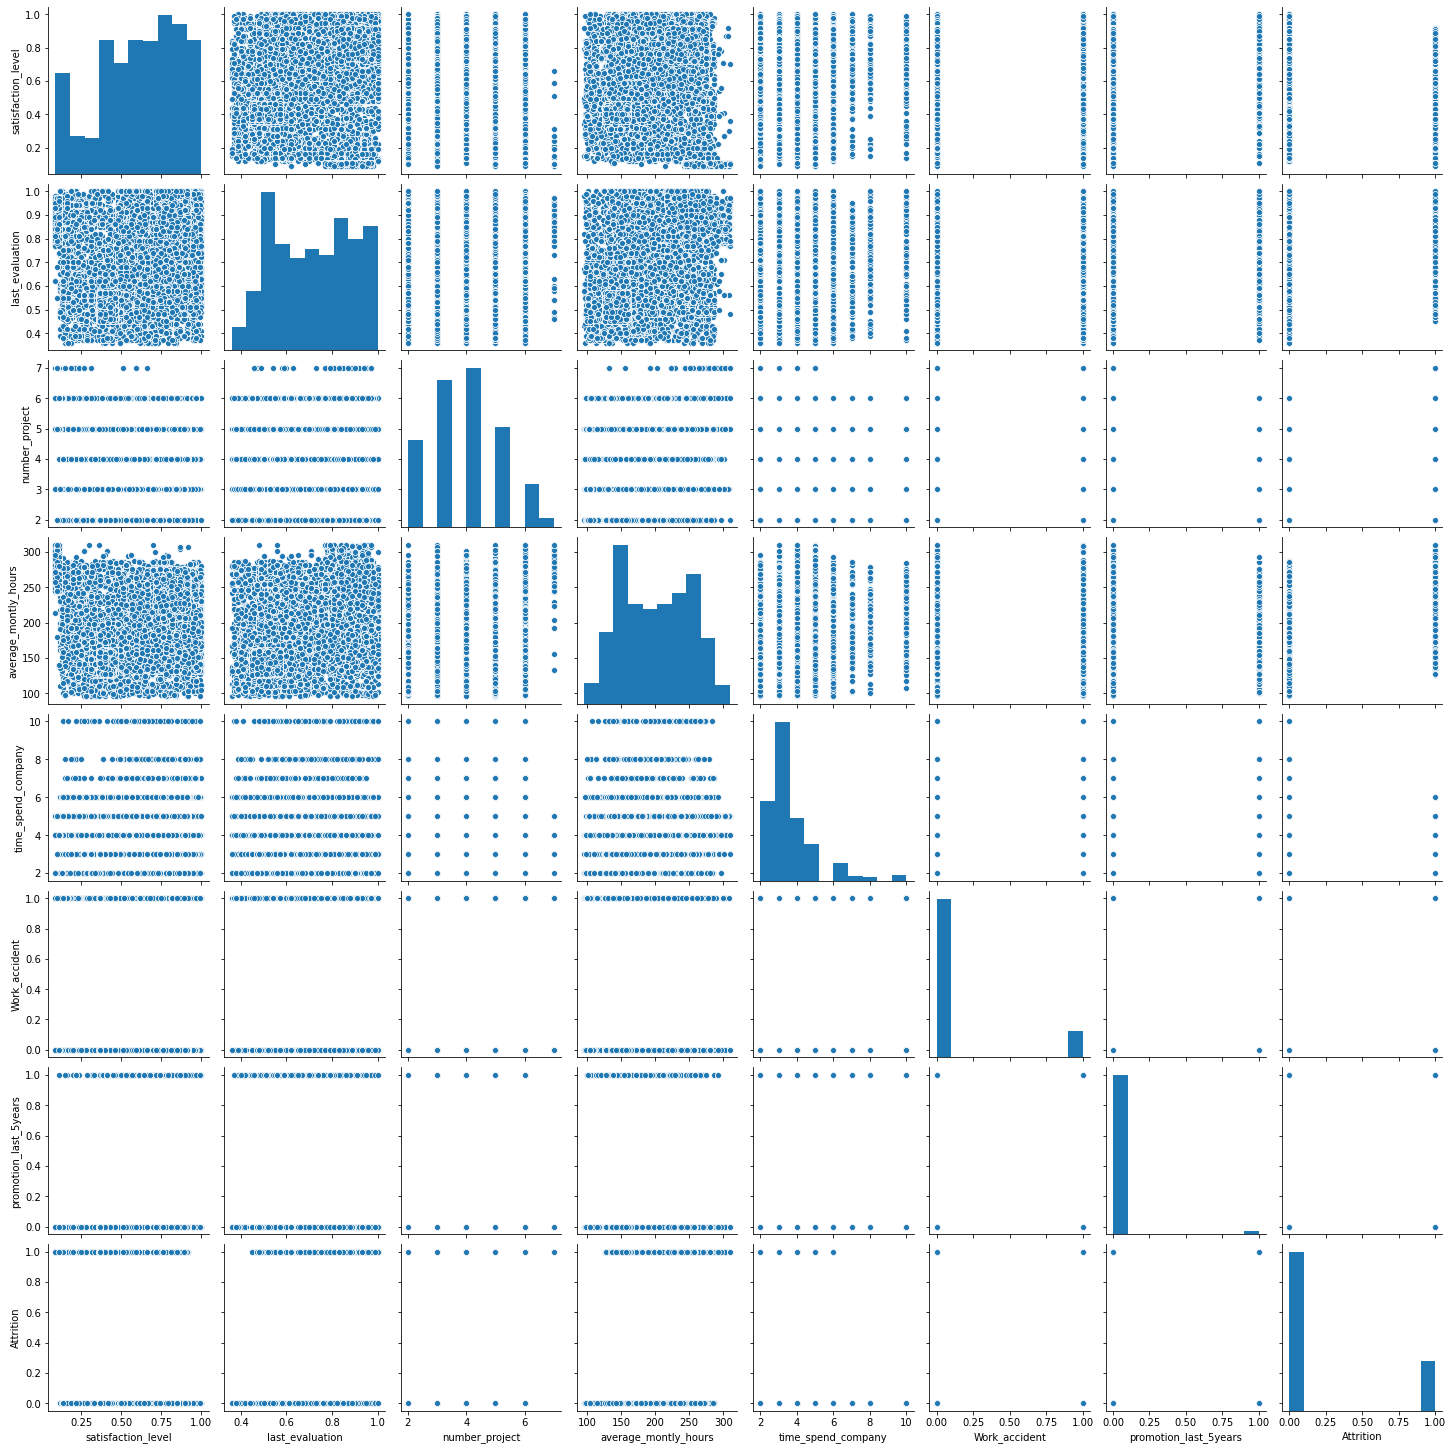

In [181]:
# plotting pairwise relationships in train
sns.pairplot(df)

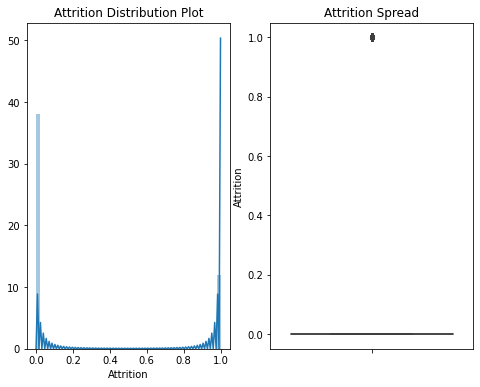

<Figure size 432x288 with 0 Axes>

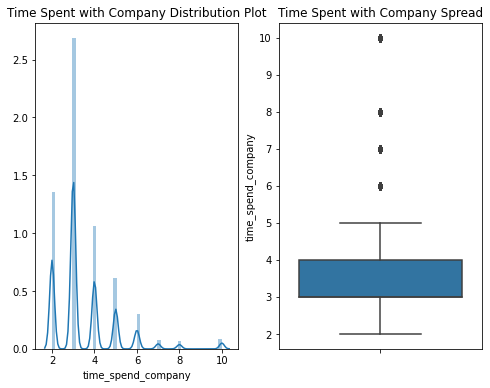

<Figure size 432x288 with 0 Axes>

In [191]:
# Distribution Plot and Boxplot to learn about features' distribution and also, to know about outliers if present.

plt.figure(figsize=(8,6))

plt.subplot(1,2,1)
plt.title('Attrition Distribution Plot')
sns.distplot(df['Attrition'])

plt.subplot(1,2,2)
plt.title('Attrition Spread')
sns.boxplot(y=df['Attrition'])

plt.show()
plt.tight_layout()

plt.figure(figsize=(8,6))

plt.subplot(1,2,1)
plt.title('Time Spent with Company Distribution Plot')
sns.distplot(df['time_spend_company'])

plt.subplot(1,2,2)
plt.title('Time Spent with Company Spread')
sns.boxplot(y=df['time_spend_company'])

plt.show()
plt.tight_layout()

Inference : <br>

Time Spent with Company is Highly Skewed. 



# 7. Data Preprocessing

In [192]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary', 'Attrition'],
      dtype='object')

In [194]:
df.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
promotion_last_5years      2
dept                      10
salary                     3
Attrition                  2
dtype: int64

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 3570
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   dept                   14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   Attrition              14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.6+ MB


In [225]:
# setting up manual weightage and encoding salary
df.loc[df.salary == "low", "salary"] = 0
df.loc[df.salary == "medium", "salary"] = 1
df.loc[df.salary == "high", "salary"] = 2

In [215]:
df.salary.unique()

array([0, 1, 2], dtype=object)

In [193]:
!pip install --upgrade category_encoders

     |████████████████████████████████| 81kB 5.0MB/s 


In [226]:
from sklearn import base
from sklearn.model_selection import KFold

class KFoldTargetEncoderTrain(base.BaseEstimator, base.TransformerMixin):

    def __init__(self, colnames, targetName, n_fold=5, verbosity=True, discardOriginal_col = False):

        self.colnames = colnames
        self.targetName = targetName
        self.n_fold = n_fold
        self.verbosity = verbosity
        self.discardOriginal_col = discardOriginal_col

    def fit(self, X, y=None):
        return self
    def transform(self,X):

        assert(type(self.targetName) == str)
        assert(type(self.colnames) == str)
        assert(self.colnames in X.columns)
        assert(self.targetName in X.columns)

        mean_of_target = X[self.targetName].mean()
        kf = KFold(n_splits = self.n_fold, shuffle = False, random_state=0)

        col_mean_name = 'dept_enc'
        X[col_mean_name] = np.nan

        for tr_ind, val_ind in kf.split(X):
            X_tr, X_val = X.iloc[tr_ind], X.iloc[val_ind]
        #  print(tr_ind,val_ind)
            X.loc[X.index[val_ind], col_mean_name] = X_val[self.colnames].map(X_tr.groupby(self.colnames)[self.targetName].mean())

        X[col_mean_name].fillna(mean_of_target, inplace = True)

        if self.verbosity:

            encoded_feature = X[col_mean_name].values
            print('Correlation between the new feature, {} and, {} is {}.'.format(col_mean_name,
                                                                                      self.targetName,
                                                                                      np.corrcoef(X[self.targetName].values, encoded_feature)[0][1]))
        if self.discardOriginal_col:
            X = X.drop(self.targetName, axis=1)
            
        return X

In [227]:
targetc = KFoldTargetEncoderTrain('dept', 'Attrition', n_fold = 5)
df = targetc.fit_transform(df)

Correlation between the new feature, dept_enc and, Attrition is -0.5029768848262148.


In [228]:
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Attrition,dept_enc
0,0.58,0.74,4,215,3,0,0,sales,0,0,0.26454
1,0.82,0.67,2,202,3,0,0,sales,0,0,0.26454
2,0.45,0.69,5,193,3,0,0,sales,0,0,0.26454
3,0.78,0.82,5,247,3,0,0,sales,0,0,0.26454
4,0.49,0.60,3,214,2,0,0,sales,0,0,0.26454


In [229]:
df.drop(['dept'], inplace = True, axis = 1)

In [231]:
df['salary'] = pd.to_numeric(df['salary'])

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 3570
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   salary                 14999 non-null  int64  
 8   Attrition              14999 non-null  int64  
 9   dept_enc               14999 non-null  float64
dtypes: float64(3), int64(7)
memory usage: 1.6 MB


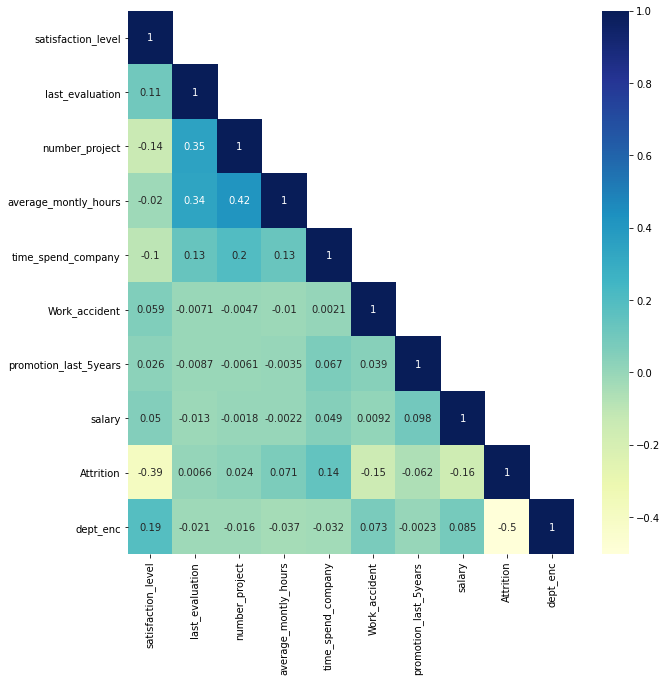

In [235]:
# Correlation using heatmap
plt.figure(figsize = (10, 10))
hm = df.corr().where(np.tril(np.ones(df.corr().shape)).astype(np.bool))
sns.heatmap(hm, annot = True, cmap="YlGnBu")
plt.show()

Splitting df into x and y i.e independent variable vector and dependent variable vector.

In [275]:
x = df.drop(['Attrition'], axis = 1)
y = df.loc[:,'Attrition']

In [276]:
print(x.shape,y.shape)

(14999, 9) (14999,)


In [277]:
y = y.values.reshape(-1,1)

In [240]:
# checking the skewness of x
x.skew(axis = 0)

satisfaction_level      -0.476360
last_evaluation         -0.026622
number_project           0.337706
average_montly_hours     0.052842
time_spend_company       1.853319
Work_accident            2.021149
promotion_last_5years    6.636968
salary                   0.598882
dept_enc                -0.214298
dtype: float64

Reducing skewness of the features according to their skewness amount.

In [278]:
x.time_spend_company.unique()

array([ 3,  2,  4,  6,  5,  8, 10,  7])

In [248]:
# trying square-root and log transformations
log = np.log(x['time_spend_company'])
sqr = np.sqrt(x['time_spend_company'])
print(log.skew(), sqr.skew())

0.5885330284719315 1.1640266954287253


0.03508782665830318


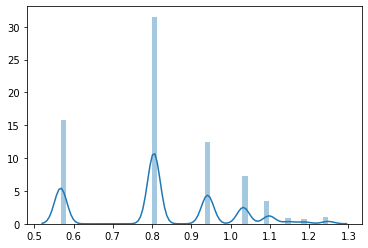

In [251]:
# Observing the distribution plot of ‘Year of Completion of college’ after boxcox transformation.
from scipy import stats
boxc = stats.boxcox(x['time_spend_company'])[0]
print(pd.Series(boxc).skew())
sns.distplot(boxc);

Inference : <br>

1. *Boxcox* will be the best transformation for 'time_spend_company'
2. Although, 'Work_accident' 'promotion_last_5years' are highly skewed, but we cannot run transformations on them as they're categorical features. as log and sqrt cannot handle '0'

In [279]:
# Updating the required pandas series.
a = stats.boxcox(x['time_spend_company'])[0]   
x['time_spend_company'] = a

In [280]:
x

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,dept_enc
0,0.58,0.74,4,215,0.804651,0,0,0,0.264540
1,0.82,0.67,2,202,0.804651,0,0,0,0.264540
2,0.45,0.69,5,193,0.804651,0,0,0,0.264540
3,0.78,0.82,5,247,0.804651,0,0,0,0.264540
4,0.49,0.60,3,214,0.567133,0,0,0,0.264540
...,...,...,...,...,...,...,...,...,...
3566,0.40,0.57,2,151,0.804651,0,0,0,0.047782
3567,0.37,0.48,2,160,0.804651,0,0,0,0.047782
3568,0.37,0.53,2,143,0.804651,0,0,0,0.047782
3569,0.11,0.96,6,280,0.941381,0,0,0,0.047782


Checking for Quasi-Constant Features

In [281]:
occ = x.loc[x.promotion_last_5years == 0, 'promotion_last_5years'].count()
number_of_occ_per = occ/x.shape[0] * 100
print(str(number_of_occ_per) + '%') 

97.87319154610307%


In [282]:
occ = x.loc[x.Work_accident == 0, 'Work_accident'].count()
number_of_occ_per = occ/x.shape[0] * 100
print(str(number_of_occ_per) + '%') 

85.53903593572905%


Standard Scaling all the features to come under a common range.

In [259]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x)

In [261]:
x

array([[-0.13206182,  0.13962249,  0.15978764, ..., -0.14741182,
        -0.93336794,  0.64270322],
       [ 0.83325762, -0.26934344, -1.46286291, ..., -0.14741182,
        -0.93336794,  0.64270322],
       [-0.65494319, -0.15249603,  0.97111292, ..., -0.14741182,
        -0.93336794,  0.64270322],
       ...,
       [-0.97671633, -1.08727529, -1.46286291, ..., -0.14741182,
        -0.93336794, -1.19018358],
       [-2.02247906,  1.42494396,  1.7824382 , ..., -0.14741182,
        -0.93336794, -1.19018358],
       [-0.97671633, -1.14569899, -1.46286291, ..., -0.14741182,
        -0.93336794, -1.19018358]])

In [286]:
y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

Inference : <br>
The Data is Imbalanced. So, we must use ensemble learning methods and cross validation to avoid overfitting.

# 8. Splitting into Train and Test Sets

In [263]:
y.shape

(14999, 1)

In [287]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [265]:
print(x_train.shape,y_train.shape)

(11249, 9) (11249, 1)


In [266]:
print(x_test.shape,y_test.shape) 

(3750, 9) (3750, 1)


# 9. Now, Model Testing!

Note : <br>
The Accuracy Metrics being used in Model Testing are - 

1.   Classification Report
2.   K-Fold Cross Validation Score
3.   Confusion Matrix



**1. Logistic Regression**

In [288]:
# fitting simple linear regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [289]:
# predicting the test set results
y_pred=classifier.predict(x_test)

Checking Accuracies

Text(24.0, 0.5, 'Truth')

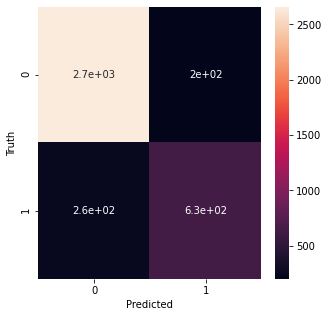

In [290]:
from sklearn.metrics import confusion_matrix, classification_report

cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [291]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2859
           1       0.76      0.71      0.73       891

    accuracy                           0.88      3750
   macro avg       0.84      0.82      0.83      3750
weighted avg       0.88      0.88      0.88      3750



In [292]:
#applying k-fold cross validation
from sklearn.model_selection import cross_val_score as cvs
accuracies = cvs(estimator=classifier,X=x_train,y=y_train,cv=10)
print(accuracies.mean())
print(accuracies.std())

0.8770569395017794
0.009642548512219084


**2. Random Forest**

In [293]:
#fitting random forest classifier to the training set
from sklearn.ensemble import RandomForestClassifier as rfc
classifier = rfc(n_estimators=100,criterion='entropy',random_state=0)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [294]:
#predicting the test set results
y_pred=classifier.predict(x_test)

Checking Accuracies

In [295]:
classifier.score(x_test, y_test)

0.9888

Text(24.0, 0.5, 'Truth')

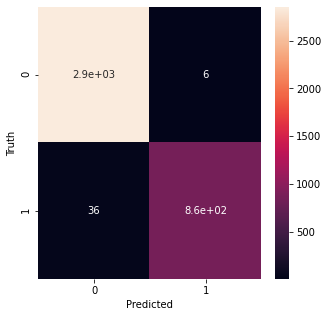

In [296]:
from sklearn.metrics import confusion_matrix, classification_report

cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [297]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2859
           1       0.99      0.96      0.98       891

    accuracy                           0.99      3750
   macro avg       0.99      0.98      0.98      3750
weighted avg       0.99      0.99      0.99      3750



In [298]:
#applying k-fold cross validation
from sklearn.model_selection import cross_val_score as cvs
accuracies = cvs(estimator=classifier,X=x_train,y=y_train,cv=10)
print(accuracies.mean())
print(accuracies.std())

0.9858657176749703
0.0031403933519250013


**3. Kernel - SVM**

In [299]:
#fitting kernel SVM to the training set
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [300]:
#predicting the test set results
y_pred=classifier.predict(x_test)

Checking Accuracies

Text(24.0, 0.5, 'Truth')

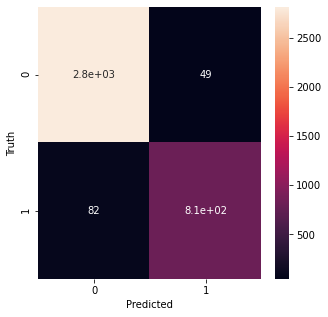

In [301]:
from sklearn.metrics import confusion_matrix, classification_report

cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [302]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2859
           1       0.94      0.91      0.93       891

    accuracy                           0.97      3750
   macro avg       0.96      0.95      0.95      3750
weighted avg       0.96      0.97      0.96      3750



In [303]:
#applying k-fold cross validation
from sklearn.model_selection import cross_val_score as cvs
accuracies = cvs(estimator=classifier,X=x_train,y=y_train,cv=10)
print(accuracies.mean())
print(accuracies.std())

0.9661299327797549
0.004066375005614819


**4. Linear - SVM**

In [304]:
# fitting kernel SVM to the training set
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [305]:
#predicting the test set results
y_pred=classifier.predict(x_test)

Checking Accuracies

Text(24.0, 0.5, 'Truth')

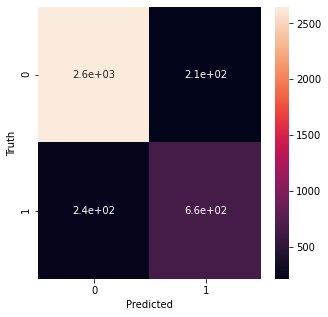

In [306]:
from sklearn.metrics import confusion_matrix, classification_report

cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [307]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      2859
           1       0.76      0.74      0.75       891

    accuracy                           0.88      3750
   macro avg       0.84      0.83      0.83      3750
weighted avg       0.88      0.88      0.88      3750



In [308]:
#applying k-fold cross validation
from sklearn.model_selection import cross_val_score as cvs
accuracies = cvs(estimator=classifier,X=x_train,y=y_train,cv=10)
print(accuracies.mean())
print(accuracies.std())

0.8787457493080268
0.009037316374084151


**5. K-NN**

In [309]:
#fitting knn to the training set
from sklearn.neighbors import KNeighborsClassifier as knc
classifier=knc(n_neighbors=10,metric='minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [310]:
#predicting the test set results
y_pred=classifier.predict(x_test)

Checking Accuracies

Text(24.0, 0.5, 'Truth')

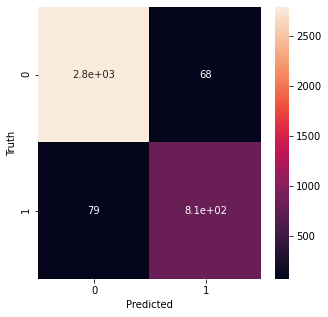

In [311]:
from sklearn.metrics import confusion_matrix, classification_report

cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [312]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2859
           1       0.92      0.91      0.92       891

    accuracy                           0.96      3750
   macro avg       0.95      0.94      0.95      3750
weighted avg       0.96      0.96      0.96      3750



In [313]:
#applying k-fold cross validation
from sklearn.model_selection import cross_val_score as cvs
accuracies = cvs(estimator=classifier,X=x_train,y=y_train,cv=10)
print(accuracies.mean())
print(accuracies.std())

0.9603511269276392
0.00463194001602779


**6. Decision Tree**

In [314]:
#fitting decision tree classifier to the training set
from sklearn.tree import DecisionTreeClassifier as dtc
classifier = dtc(criterion='entropy' , random_state=0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [315]:
#predicting the test set results
y_pred=classifier.predict(x_test)

Checking Accuracies

Text(24.0, 0.5, 'Truth')

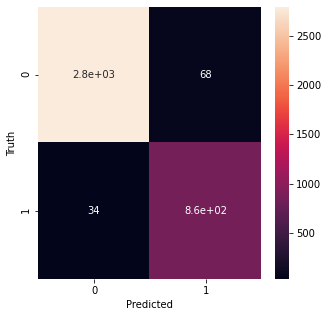

In [316]:
from sklearn.metrics import confusion_matrix, classification_report

cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [317]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2859
           1       0.93      0.96      0.94       891

    accuracy                           0.97      3750
   macro avg       0.96      0.97      0.96      3750
weighted avg       0.97      0.97      0.97      3750



In [318]:
#applying k-fold cross validation
from sklearn.model_selection import cross_val_score as cvs
accuracies = cvs(estimator=classifier,X=x_train,y=y_train,cv=10)
print(accuracies.mean())
print(accuracies.std())

0.9730642151047844
0.0031318583976180704


**7. Naive Bayes**

In [319]:
#fitting naive bayes to the training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [320]:
#predicting the test set results
y_pred=classifier.predict(x_test)

Checking Accuracies

Text(24.0, 0.5, 'Truth')

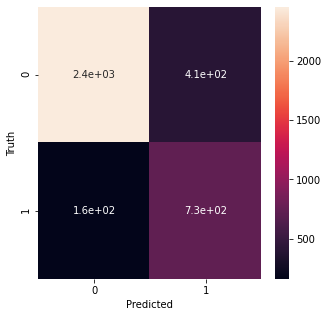

In [321]:
from sklearn.metrics import confusion_matrix, classification_report

cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [322]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      2859
           1       0.64      0.82      0.72       891

    accuracy                           0.85      3750
   macro avg       0.79      0.84      0.81      3750
weighted avg       0.87      0.85      0.85      3750



In [323]:
#applying k-fold cross validation
from sklearn.model_selection import cross_val_score as cvs
accuracies = cvs(estimator=classifier,X=x_train,y=y_train,cv=10)
print(accuracies.mean())
print(accuracies.std())

0.8431856860419137
0.01153469855450434


**8. XGBoost Classifier**

In [324]:
#fitting XGBoost to the Training Set
from xgboost import XGBClassifier
classifier=XGBClassifier()
classifier.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [325]:
#predicting the test set results
y_pred=classifier.predict(x_test)

Checking Accuracies

Text(24.0, 0.5, 'Truth')

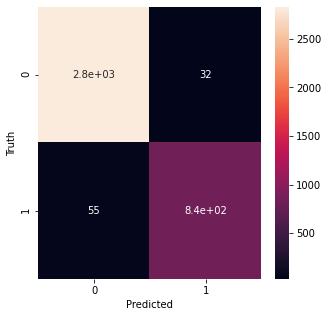

In [326]:
from sklearn.metrics import confusion_matrix, classification_report

cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [327]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2859
           1       0.96      0.94      0.95       891

    accuracy                           0.98      3750
   macro avg       0.97      0.96      0.97      3750
weighted avg       0.98      0.98      0.98      3750



In [328]:
#applying k-fold cross validation
from sklearn.model_selection import cross_val_score as cvs
accuracies = cvs(estimator=classifier,X=x_train,y=y_train,cv=10)
print(accuracies.mean())
print(accuracies.std())

0.9747529458283907
0.0038404823003713915


**9. GradientBoosting Classifier**

In [329]:
#fitting XGBoost to the Training Set
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
classifier.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [330]:
#predicting the test set results
y_pred=classifier.predict(x_test)

Checking Accuracies

Text(24.0, 0.5, 'Truth')

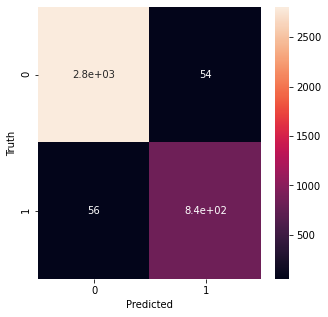

In [331]:
from sklearn.metrics import confusion_matrix, classification_report

cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [332]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2859
           1       0.94      0.94      0.94       891

    accuracy                           0.97      3750
   macro avg       0.96      0.96      0.96      3750
weighted avg       0.97      0.97      0.97      3750



In [333]:
#applying k-fold cross validation
from sklearn.model_selection import cross_val_score as cvs
accuracies = cvs(estimator=classifier,X=x_train,y=y_train,cv=10)
print(accuracies.mean())
print(accuracies.std())

0.9704862791617239
0.002969328404011361


**10. AdaBoost Classifier**

In [334]:
#fitting XGBoost to the Training Set
from sklearn.ensemble import AdaBoostClassifier
dt = dtc()
classifier = AdaBoostClassifier(n_estimators = 100, base_estimator = dt, learning_rate = 1)
classifier.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [335]:
#predicting the test set results
y_pred=classifier.predict(x_test)

Checking Accuracies

Text(24.0, 0.5, 'Truth')

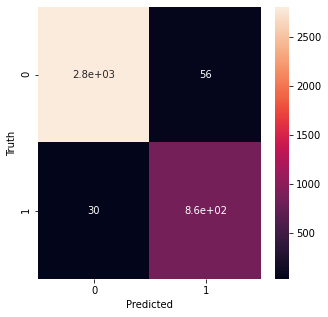

In [336]:
from sklearn.metrics import confusion_matrix, classification_report

cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [337]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2859
           1       0.94      0.97      0.95       891

    accuracy                           0.98      3750
   macro avg       0.96      0.97      0.97      3750
weighted avg       0.98      0.98      0.98      3750



In [338]:
#applying k-fold cross validation
from sklearn.model_selection import cross_val_score as cvs
accuracies = cvs(estimator=classifier,X=x_train,y=y_train,cv=10)
print(accuracies.mean())
print(accuracies.std())

0.9733315935152234
0.0049145763744900305


**11. CatBoost Classifier**

In [339]:
!pip install catboost

     |████████████████████████████████| 64.8MB 57kB/s 


In [340]:
#fitting CatBoost to the Training Set
from catboost import CatBoostClassifier
classifier = CatBoostClassifier(iterations=100, learning_rate=0.01)
classifier.fit(x_train,y_train, eval_set = (x_test, y_test))

0:	learn: 0.6848853	test: 0.6849223	best: 0.6849223 (0)	total: 52ms	remaining: 5.15s
1:	learn: 0.6768048	test: 0.6768853	best: 0.6768853 (1)	total: 55.3ms	remaining: 2.71s
2:	learn: 0.6688408	test: 0.6689500	best: 0.6689500 (2)	total: 58.6ms	remaining: 1.9s
3:	learn: 0.6613029	test: 0.6614307	best: 0.6614307 (3)	total: 62ms	remaining: 1.49s
4:	learn: 0.6537458	test: 0.6539312	best: 0.6539312 (4)	total: 65.3ms	remaining: 1.24s
5:	learn: 0.6463182	test: 0.6465644	best: 0.6465644 (5)	total: 68.9ms	remaining: 1.08s
6:	learn: 0.6389767	test: 0.6393038	best: 0.6393038 (6)	total: 72.3ms	remaining: 960ms
7:	learn: 0.6318419	test: 0.6321856	best: 0.6321856 (7)	total: 75.5ms	remaining: 869ms
8:	learn: 0.6251864	test: 0.6255762	best: 0.6255762 (8)	total: 78.7ms	remaining: 796ms
9:	learn: 0.6181689	test: 0.6185821	best: 0.6185821 (9)	total: 81.8ms	remaining: 736ms
10:	learn: 0.6111821	test: 0.6116037	best: 0.6116037 (10)	total: 84.9ms	remaining: 687ms
11:	learn: 0.6047060	test: 0.6052074	best: 0.6

In [341]:
#predicting the test set results
y_pred=classifier.predict(x_test)

Checking Accuracies

Text(24.0, 0.5, 'Truth')

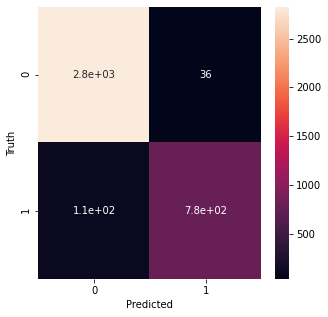

In [342]:
from sklearn.metrics import confusion_matrix, classification_report

cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [343]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2859
           1       0.96      0.88      0.92       891

    accuracy                           0.96      3750
   macro avg       0.96      0.93      0.95      3750
weighted avg       0.96      0.96      0.96      3750



In [344]:
#applying k-fold cross validation
from sklearn.model_selection import cross_val_score as cvs
accuracies = cvs(estimator=classifier,X=x_train,y=y_train,cv=10)
print(accuracies.mean())
print(accuracies.std())

0:	learn: 0.6852938	total: 3.29ms	remaining: 325ms
1:	learn: 0.6772441	total: 6.42ms	remaining: 314ms
2:	learn: 0.6695481	total: 9.28ms	remaining: 300ms
3:	learn: 0.6620334	total: 12.6ms	remaining: 303ms
4:	learn: 0.6544778	total: 15.4ms	remaining: 293ms
5:	learn: 0.6471468	total: 18.2ms	remaining: 285ms
6:	learn: 0.6396295	total: 20.9ms	remaining: 277ms
7:	learn: 0.6325080	total: 23.6ms	remaining: 271ms
8:	learn: 0.6257855	total: 26.3ms	remaining: 266ms
9:	learn: 0.6190605	total: 29ms	remaining: 261ms
10:	learn: 0.6121456	total: 32ms	remaining: 259ms
11:	learn: 0.6058538	total: 34.8ms	remaining: 255ms
12:	learn: 0.5995970	total: 37.5ms	remaining: 251ms
13:	learn: 0.5930594	total: 40.2ms	remaining: 247ms
14:	learn: 0.5871349	total: 43ms	remaining: 244ms
15:	learn: 0.5810923	total: 45.6ms	remaining: 240ms
16:	learn: 0.5753854	total: 48.3ms	remaining: 236ms
17:	learn: 0.5692911	total: 51.1ms	remaining: 233ms
18:	learn: 0.5635838	total: 53.9ms	remaining: 230ms
19:	learn: 0.5577340	total: 

**12. Light GBM**

In [345]:
!pip install lightgbm

In [346]:
import lightgbm as lgbm
# from sklearn import preprocessing

In [347]:
# kfold = KFold(n_splits=5, random_state = 0, shuffle = True)

model_lgb = lgbm.LGBMClassifier(n_iterations =50, silent = False)
model_lgb.fit(x_train, y_train)
model_lgb.score(x_test, y_test)

0.9861333333333333

Therefore, The Accuracies of the Models are - <br>
     Model Name   -----   Accuracy f1-score-1 ----- f1-score-0
1. Logistic Regression : 0.88 0.92 0.73
2. Random Forest : 0.99 0.99 0.98
3. Kernel-SVM : 0.97 0.98 0.93
4. Liner-SVM : 0.88 0.92 0.75
5. KNN : 0.96 0.97 0.92
6. Decision Tree : 0.97 0.98 0.94
7. Naive Bayes : 0.85 0.90 0.72
8. XGBoost Classifier : 0.98 0.98 0.95
9. GradientBoosting Classifier : 0.97 0.98 0.94
10. AdaBoost Classifier : 0.98 0.98 0.95
11. CatBoost Classifier : 0.96 0.97 0.92
12. LightGBM : 0.98

# So, our Best Model Selected according to its performance is Random Forest !

# 10. Hyperparameter Tuning and Model Optimization

Using GridSearch for searching best hyperparameter.   
Model: Random Forest Classifier

In [348]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV   
from sklearn.model_selection import StratifiedKFold

In [351]:
# using grid search method to find out the best groups of hyperparameters
classifier = rfc(random_state=0)
class_cv = GridSearchCV(classifier, {"criterion":["gini","entropy"], "max_features":["auto", "sqrt", "log2"]
                            ,'max_depth': [3,4,6,8], 'n_estimators': [100,200,500], }, verbose=1)
class_cv.fit(x_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  7.2min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                

In [352]:
#dictionary of the best parameters
class_cv.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [353]:
classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

Train data using Random Forest with best parameters

In [355]:
classification = rfc(**class_cv.best_params_)
classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Predicting the Results.

In [356]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 1, 0, ..., 1, 0, 0])

Evaluating its Score

Text(24.0, 0.5, 'Truth')

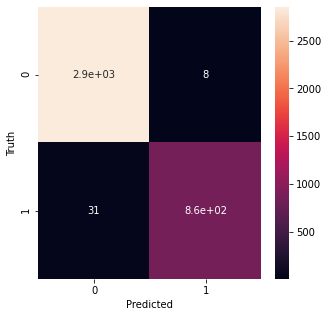

In [360]:
from sklearn.metrics import confusion_matrix, classification_report

cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


***Classification Report Before Hyperparameter Tuning***


```
                precision    recall  f1-score   support

           0       0.99      1.00      0.99      2859
           1       0.99      0.96      0.98       891

    accuracy                           0.99      3750
   macro avg       0.99      0.98      0.98      3750
weighted avg       0.99      0.99      0.99      3750
```



In [364]:
print("***Classification Report After Hyperparameter Tuning***")
print("\n")
print(classification_report(y_test, y_pred))

***Classification Report After Hyperparameter Tuning***


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2859
           1       0.99      0.97      0.98       891

    accuracy                           0.99      3750
   macro avg       0.99      0.98      0.99      3750
weighted avg       0.99      0.99      0.99      3750



In [362]:
# applying k-fold cross validation
from sklearn.model_selection import cross_val_score as cvs
accuracies = cvs(estimator=classifier,X=x_train,y=y_train,cv=10)
print(accuracies.mean())
print(accuracies.std())

0.9863990510083036
0.0025458504016462502


Inference : <br>
So, there's a slight improvement in our Model After HyperParameter Tuning. 
Recall has been increased by 0.1% which is great given our dataset was imbalanced. <br>
<br>
So, Finally Our Overall Model Accuracy Stands at - 99%

with, 99% Accuracy on '0' Label and <br>
      98% Accuracy on '1' Label, which was our Prime Goal.

# 11. Saving the Model

In [365]:
import pickle
filename = 'Codepth.pkl'
pickle.dump(classifier, open(filename, 'wb'))

# 12. Creating a ML Pipeline

Note : 'boxcox' transformation has not been performed here as no 'column transformer' has been designed till yet that can handle 'boxcox' transformations and fit it.

In [366]:
from sklearn.pipeline import Pipeline

In [368]:
pipe = Pipeline([('standard', StandardScaler()),
                    #('boxcox'), stats.boxcox()),
                    ('randomforest', rfc(**class_cv.best_params_))])

In [369]:
pipe.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('standard',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforest',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=8, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=200, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [370]:
score = pipe.score(x_test, y_test)
print('Random Forest Pipeline Test Accuracy: %.3f' % score)

Random Forest Pipeline Test Accuracy: 0.981


Note : There's a reduce in accuracy as 'boxcox' transformation was not performed in the pipeline.


# 13. Generating Requirements File

In [371]:
!pip freeze > requirements.txt

# End